In [1]:
pip install numpy matplotlib Pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# Load the image
img = Image.open('COMEAU.jpg').convert('L')  # Convert to grayscale
img = np.array(img)  # Convert to numpy array

In [5]:
def floyd_steinberg_dithering(image):
    h, w = image.shape
    dithered = np.copy(image)
    
    for y in range(h):
        for x in range(w):
            old_pixel = dithered[y, x]
            new_pixel = 255 * (old_pixel // 128)  # Threshold to either 0 or 255
            dithered[y, x] = new_pixel
            quant_error = old_pixel - new_pixel
            
            if x < w - 1:
                dithered[y, x + 1] += quant_error * 7 / 16
            if x > 0 and y < h - 1:
                dithered[y + 1, x - 1] += quant_error * 3 / 16
            if y < h - 1:
                dithered[y + 1, x] += quant_error * 5 / 16
            if x < w - 1 and y < h - 1:
                dithered[y + 1, x + 1] += quant_error * 1 / 16

    dithered = np.clip(dithered, 0, 255).astype(np.uint8)
    return dithered


In [6]:
def jarvis_dithering(image):
    h, w = image.shape
    dithered = np.copy(image)
    
    for y in range(h):
        for x in range(w):
            old_pixel = dithered[y, x]
            new_pixel = 255 * (old_pixel // 128)  # Threshold to either 0 or 255
            dithered[y, x] = new_pixel
            quant_error = old_pixel - new_pixel
            
            # Distributing the error
            if x < w - 1:
                dithered[y, x + 1] += quant_error * 7 / 48
            if x < w - 2:
                dithered[y, x + 2] += quant_error * 5 / 48
            if y < h - 1:
                if x > 0:
                    dithered[y + 1, x - 1] += quant_error * 3 / 48
                dithered[y + 1, x] += quant_error * 5 / 48
                if x < w - 1:
                    dithered[y + 1, x + 1] += quant_error * 3 / 48
            if y < h - 2:
                if x > 1:
                    dithered[y + 2, x - 2] += quant_error * 1 / 48
                if x > 0:
                    dithered[y + 2, x - 1] += quant_error * 3 / 48
                dithered[y + 2, x] += quant_error * 5 / 48
                if x < w - 1:
                    dithered[y + 2, x + 1] += quant_error * 3 / 48
                if x < w - 2:
                    dithered[y + 2, x + 2] += quant_error * 1 / 48

    dithered = np.clip(dithered, 0, 255).astype(np.uint8)
    return dithered


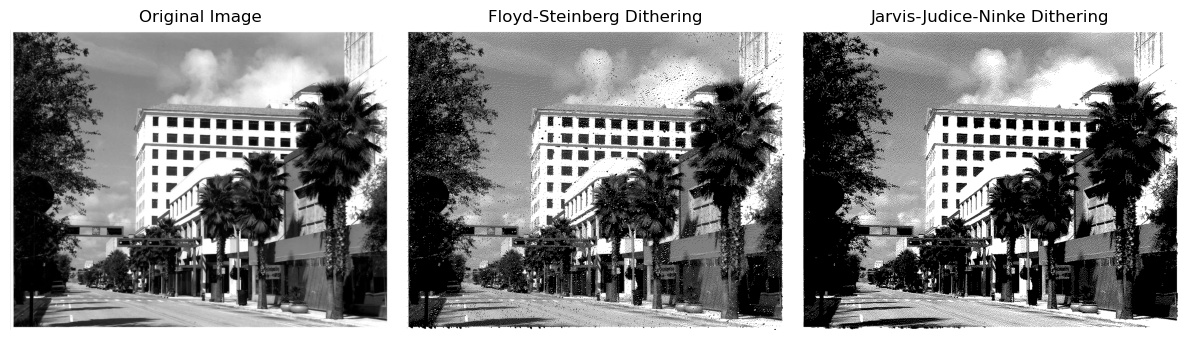

In [7]:
# Apply dithering
floyd_dithered = floyd_steinberg_dithering(img)
jarvis_dithered = jarvis_dithering(img)

# Plotting results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Floyd-Steinberg Dithering')
plt.imshow(floyd_dithered, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Jarvis-Judice-Ninke Dithering')
plt.imshow(jarvis_dithered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Comparison

In the comparison, you will observe differences in the visual appearance between the Floyd-Steinberg and Jarvis-Judice-Ninke dithering techniques. Floyd-Steinberg tends to produce smoother gradients with less visible patterns, while Jarvis-Judice-Ninke can create more pronounced structures and is often slower due to the larger area of error diffusion